# Chemistry Tutorial
This tutorial shows how to compute chemistry with ``chemcat`` under different assumptions for temperature, metallicity, and custom elemental abundances.

Let's start off importing the necessary modules:

In [1]:
import chemcat as cat
import chemcat.utils as u
import numpy as np

## Basic Run
``chemcat`` is an object-oriented code that keeps all the thermochemical properties in place.  In it most basic usage, all it requres is a pressure-temperature profile and a list of species.

This creates a chemical network assuming solar elemental composition and a simple CHNO compostion (taking values from Asplund et al. 2021):

In [2]:
nlayers = 81
temperature = np.tile(1200.0, nlayers)
pressure = np.logspace(-8, 3, nlayers)
molecules = 'H2O CH4 CO CO2 NH3 N2 H2 HCN OH C2H2 C2H4 H He C N O'.split()

net = cat.Network(pressure, temperature, molecules)

In [3]:
# To compute thermochemical equilibrium abundances, run this method:
vmr = net.thermochemical_equilibrium()

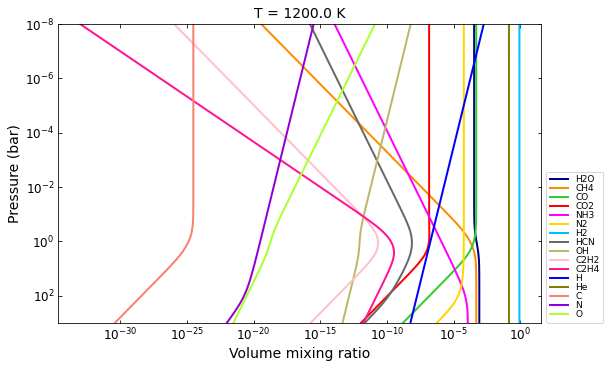

In [4]:
# and plot the results:
title = f'T = {temperature[0]} K'
ax = u.plot_vmr(pressure, vmr, net.species, title=title, fignum=10)

### Evaluate at a different temperature

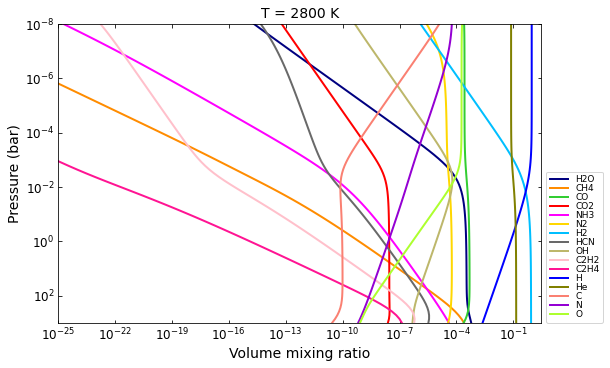

In [5]:
# Simply, provide a new temperature profile in the call:
temp_2800K = np.tile(2800, nlayers)
vmr = net.thermochemical_equilibrium(temperature=temp_2800K)

title = f'T = {temp_2800K[0]} K'
vmr_range = (1e-25, 3)
ax = u.plot_vmr(pressure, vmr, net.species, vmr_range=vmr_range, title=title, fignum=20)

### Object's data
The ``net`` object contains all the physical data of the atmosphere, which you can query at any point:

In [6]:
print(f'Pressure profile (bar):\n{net.pressure}')
print(f'\nTemperature profile (kelvin):\n{net.temperature}')

print(f'\nElemental composition:\n{net.elements}')
print('\nElemental abundances (normalized to H_abundance==1.0)'
      f'\n(same order as in the array above):\n{net.element_rel_abundance}')
print(f'\nElemental composition source:\n{net.element_file}')

print(f'\n\nMolecular composition:\n{net.species}')
print(f'Source for each species thermochemical data:\n{net.provenance}')
print(
    '\nStoichiometric values matrix for each species:'
    '\n(order of values goes according to order of elements and species arrays)'
    f'\n{net.stoich_vals}')

Pressure profile (bar):
[1.00000000e-08 1.37246096e-08 1.88364909e-08 2.58523484e-08
 3.54813389e-08 4.86967525e-08 6.68343918e-08 9.17275935e-08
 1.25892541e-07 1.72782598e-07 2.37137371e-07 3.25461783e-07
 4.46683592e-07 6.13055792e-07 8.41395142e-07 1.15478198e-06
 1.58489319e-06 2.17520403e-06 2.98538262e-06 4.09732110e-06
 5.62341325e-06 7.71791516e-06 1.05925373e-05 1.45378439e-05
 1.99526231e-05 2.73841963e-05 3.75837404e-05 5.15822165e-05
 7.07945784e-05 9.71627952e-05 1.33352143e-04 1.83020611e-04
 2.51188643e-04 3.44746607e-04 4.73151259e-04 6.49381632e-04
 8.91250938e-04 1.22320712e-03 1.67880402e-03 2.30409298e-03
 3.16227766e-03 4.34010264e-03 5.95662144e-03 8.17523038e-03
 1.12201845e-02 1.53992653e-02 2.11348904e-02 2.90068120e-02
 3.98107171e-02 5.46386550e-02 7.49894209e-02 1.02920053e-01
 1.41253754e-01 1.93865264e-01 2.66072506e-01 3.65174127e-01
 5.01187234e-01 6.87859912e-01 9.44060876e-01 1.29568670e+00
 1.77827941e+00 2.44061907e+00 3.34965439e+00 4.59726989e+00


## Custom compositions
There are a few alternatives evaluate thermochemical equilibrium for different compositions

### Custom metallicity
Use the `metallicity` argument to set a custom metallicity relative to solar (in dex units)

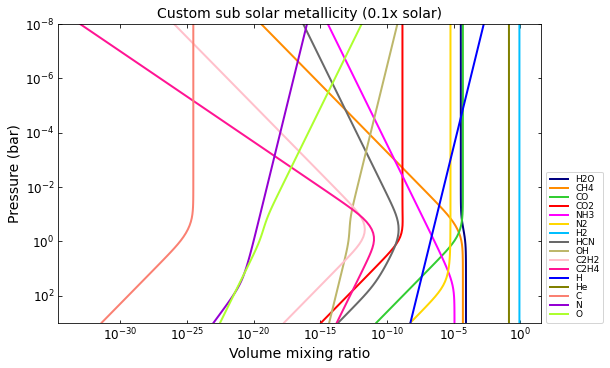

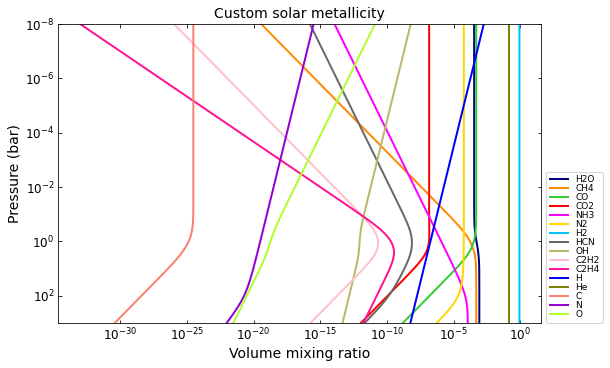

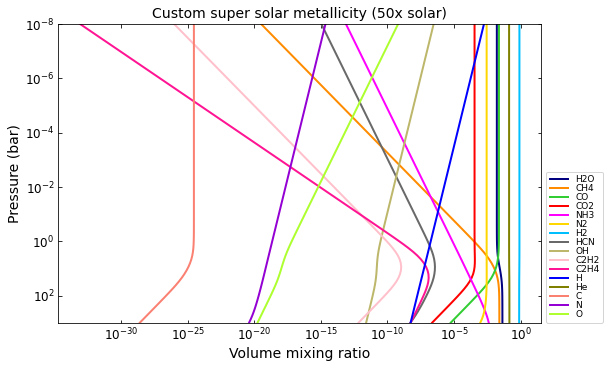

In [7]:
# E.g., solar metallicity (default):
net = cat.Network(pressure, temperature, molecules)
vmr_custom_solar = net.thermochemical_equilibrium(
    metallicity=0.0,
)

# e.g, 0.1x solar metallicity:
vmr_custom_sub_solar = net.thermochemical_equilibrium(
    metallicity=-1.0,
)

# e.g, 50x solar metallicity:
metallicity = np.log10(50.0)
vmr_custom_super_solar = net.thermochemical_equilibrium(
    metallicity=metallicity,
)


# And plot the results:
title = 'Custom sub solar metallicity (0.1x solar)'
ax = u.plot_vmr(pressure, vmr_custom_sub_solar, net.species, title=title, fignum=30)

title = 'Custom solar metallicity'
ax = u.plot_vmr(pressure, vmr_custom_solar, net.species, title=title, fignum=31)

title = 'Custom super solar metallicity (50x solar)'
ax = u.plot_vmr(pressure, vmr_custom_super_solar, net.species, title=title, fignum=32)

Note that once you modify a physical property, it stays modified until you re-set it again:

In [8]:
print(f'[M/H] = {net.metallicity:.2f}')
print(f'Elemental abundances:\n{net.element_rel_abundance}')

# You can modify the properties directly:
net.metallicity = 0.0
print(f'\n[M/H] = {net.metallicity}')
print(f'Elemental abundances:\n{net.element_rel_abundance}')

# Or, you can modify the properties via a call:
# e.g, 50x solar:
vmr_custom_super_solar = net.thermochemical_equilibrium(
    metallicity=np.log10(50.0),
)
print(f'\n[M/H] = {net.metallicity:.2f}')
print(f'Elemental abundances:\n{net.element_rel_abundance}')

[M/H] = 1.70
Elemental abundances:
[0.01442016 1.         0.08203515 0.00338041 0.02448894]

[M/H] = 0.0
Elemental abundances:
[2.88403150e-04 1.00000000e+00 8.20351544e-02 6.76082975e-05
 4.89778819e-04]

[M/H] = 1.70
Elemental abundances:
[0.01442016 1.         0.08203515 0.00338041 0.02448894]


### Custom elemental abundances
Use the `e_abundances` argument to set  custom elemental abundances as a dictionary: (values in dex units, relative to H=12.0):

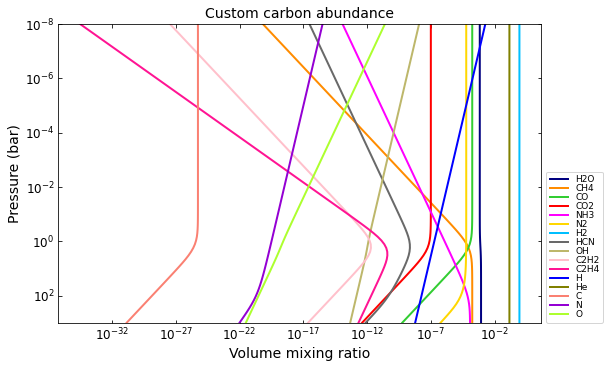

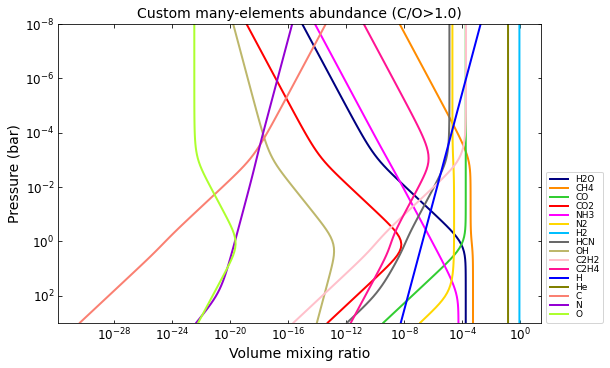

In [9]:
# E.g., set carbon abundance to 10^-4
e_abundances = {
    'C': 8.0,
}
vmr_custom_abundance1 = net.thermochemical_equilibrium(
    metallicity=0.0,
    e_abundances=e_abundances,
)

# You can set values for as many elements as you want, e.g.:
e_abundances = {
    'C': 8.5,
    'N': 7.5,
    'O': 8.0,
}
vmr_custom_abundance2 = net.thermochemical_equilibrium(
    e_abundances=e_abundances,
)

# And plot the results:
title = 'Custom carbon abundance'
ax = u.plot_vmr(pressure, vmr_custom_abundance1, net.species, title=title, fignum=33)

title = 'Custom many-elements abundance (C/O>1.0)'
ax = u.plot_vmr(pressure, vmr_custom_abundance2, net.species, title=title, fignum=34)

### Elemental abundances relative to solar
Use the `e_scale` argument to set custom elemental abundances as a dictionary (values in dex units, relative to solar):

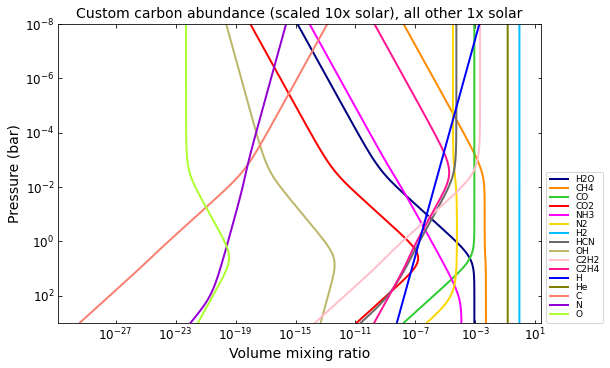

In [10]:
# E.g., Set 10x solar carbon, 1x nitrogen, and 1x oxygen
e_scale = {
    'C': 1.0,
    'N': 0.0,
    'O': 0.0,
}

vmr_custom_scale_carbon = net.thermochemical_equilibrium(
    metallicity=0.0,
    e_abundances={},
    e_scale=e_scale,
)

# And plot the results:
title = 'Custom carbon abundance (scaled 10x solar), all other 1x solar'
ax = u.plot_vmr(pressure, vmr_custom_scale_carbon, net.species, title=title, fignum=35)

### Custom elemental ratios
Use the `e_ratio` argument to set custom elemental abundances as a dictionary (values are **not** in dex units, relative to a second elemental abundance).  

Note that the dictionary keys define the pair of elements separated by an underscore.
Only the first element abundance is modified, and is scaled relative to the second element's abundance.

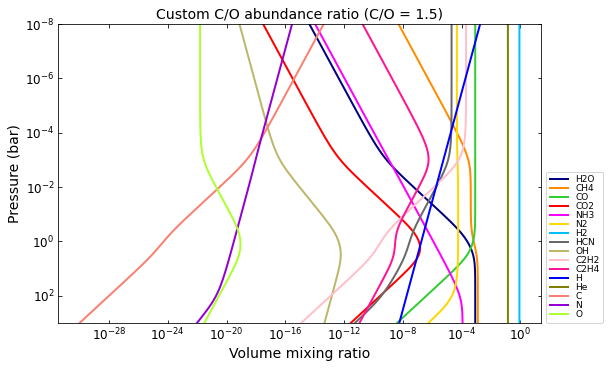

In [11]:
# E.g., set carbon abundance to 1.5x times the oxygen abundance:
e_ratio = {
    'C_O': 1.5,
}

vmr_custom_ratio = net.thermochemical_equilibrium(
    metallicity=0.0,
    e_abundances={},
    e_ratio=e_ratio,
)

# And plot the results:
title = 'Custom C/O abundance ratio (C/O = 1.5)'
ax = u.plot_vmr(pressure, vmr_custom_ratio, net.species, title=title, fignum=36)

And you can combine all these properties at once:

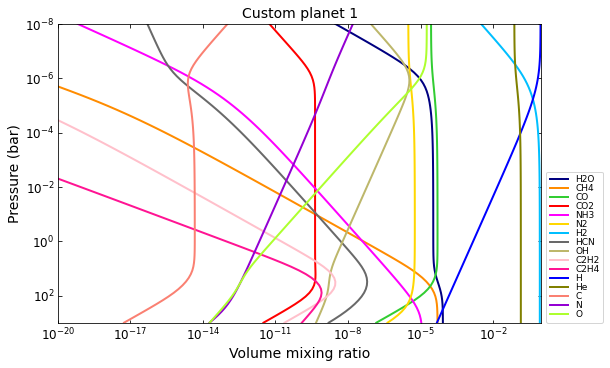

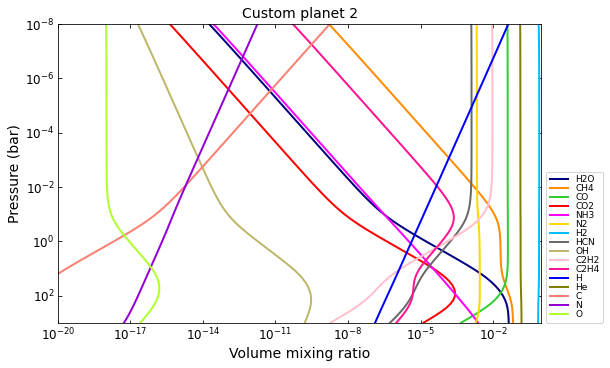

In [12]:
# Custom metallicity, C/O ratio, and temperatures:

# Hot, sub-solar (0.1x), C/O < 1.0:
temp_2000K = np.tile(2000.0, nlayers)
metal_sub_solar = -1.0
e_ratio = {
    'C_O': 0.6,
}
vmr_custom1 = net.thermochemical_equilibrium(
    temperature=temp_2000K,
    metallicity=metal_sub_solar,
    e_ratio=e_ratio,
)

# Colder, super-solar (50x), and C/O > 1.0:
temp_1400K = np.tile(1400.0, nlayers)
metal_super_solar = np.log10(50.0)
e_ratio = {
    'C_O': 1.5,
}
vmr_custom2 = net.thermochemical_equilibrium(
    temperature=temp_1400K,
    metallicity=metal_super_solar,
    e_ratio=e_ratio,
)


# And plot the results:
vmr_range = (1e-20, 1)
title = 'Custom planet 1'
ax = u.plot_vmr(
    pressure, vmr_custom1, net.species,
    title=title, fignum=37, vmr_range=vmr_range,
)

title = 'Custom planet 2'
ax = u.plot_vmr(
    pressure, vmr_custom2, net.species,
    title=title, fignum=38, vmr_range=vmr_range,
)

## Charge conservation
- Charge conservation is also available, ions are specified by species names followed by a ``+`` or a ``-``
- Normally, you always need to include an electron in the mix: 'e-'

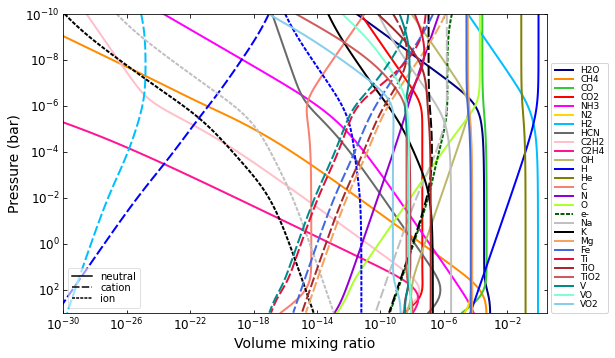

In [13]:
nlayers = 81
temp = 2000.0
temperature = np.tile(temp, nlayers)
pressure = np.logspace(-10, 3, nlayers)

HCNO_neutrals = 'H2O CH4 CO CO2 NH3 N2 H2 HCN C2H2 C2H4 OH H He C N O'.split()
ions = 'e- H- H+ H2+ He+'.split()
alkali = 'Na Na- Na+ K K- K+'.split()
metals = 'Mg Mg+ Fe Fe+'.split()
metal_oxides = 'Ti TiO TiO2 Ti+ TiO+ V VO VO2 V+'.split()
molecules = (
    HCNO_neutrals
    + ions
    + alkali
    + metals
    + metal_oxides
)

net = cat.Network(pressure, temperature, molecules)
vmr = net.thermochemical_equilibrium()
vmr_range = (1e-30, 3)
ax = u.plot_vmr(pressure, vmr, net.species, vmr_range=vmr_range, fignum=40)